In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.api import SimpleExpSmoothing
from ipywidgets import interact,widgets
from statsmodels.tsa.api import Holt, ExponentialSmoothing

In [2]:
df=pd.read_csv('500820.csv')
y_train=df['Close Price'].iloc[:-12]
y_test=df['Close Price'].iloc[-12:]


C:\Users\dai\AppData\Roaming\Python\Python313\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


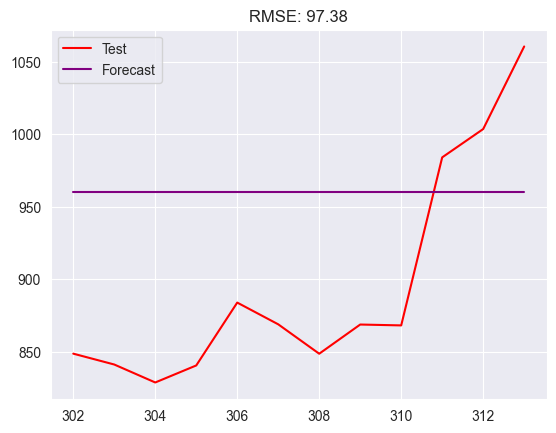

In [5]:
from sklearn.metrics import root_mean_squared_error

alpha=0.1
ses=SimpleExpSmoothing(y_train)
fit1=ses.fit(smoothing_level=alpha)
fcast1=fit1.forecast(len(y_test))
y_test.plot(color='red',label='Test')
fcast1.plot(color='purple',label='Forecast')
rmse=root_mean_squared_error(y_test,fcast1)
plt.title(f'RMSE: {rmse:.2f}')
plt.legend(loc='best')
plt.show()

In [22]:
df=pd.read_csv('monthly-beer-production-in-austr.csv')

y_train=df['Monthly beer production'].iloc[:-12]
y_test=df['Monthly beer production'].iloc[-12:]

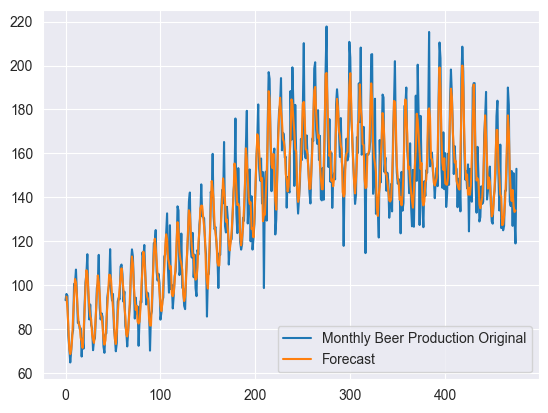

In [23]:
y=df['Monthly beer production']
fcast=y.rolling(3,center=True).mean()
plt.plot(y,label='Monthly Beer Production Original')
plt.plot(fcast,label='Forecast')
plt.legend(loc='best')
plt.show()

For this normal up and down pattern we use Holt Winters

In [26]:
def hw(alpha,beta,gamma,seasonality,periods=12):
    holt=ExponentialSmoothing(y_train,trend='add', seasonal=seasonality,seasonal_periods=periods)
    fit1=holt.fit(smoothing_trend=beta,smoothing_level=alpha,smoothing_seasonal=gamma)
    fcast1=fit1.forecast(len(y_test))
    y_test.plot(color='pink',label='Test')
    fcast1.plot(color='purple',label='Forecast')
    rmse=root_mean_squared_error(y_test,fcast1)
    plt.title(f'RMSE: {rmse:.2f}, alpha={alpha:.2f}, beta={beta:.2f}, gamma={gamma:.2f}')
    plt.legend(loc='best')
    plt.show()
widgets.interact(hw,alpha=(0.01,1,0.01),beta=(0.01,1,0.01),gamma=(0.01,1,0.01),seasonality=['add','mul'])

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), FloatSlider(v…

<function __main__.hw(alpha, beta, gamma, seasonality, periods=12)>